In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data = load_breast_cancer()
X, y = data['data'], data['target']

In [6]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [7]:
print(data['target_names'])

['malignant' 'benign']


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
print(tree_clf.score(x_test, y_test))

0.9298245614035088


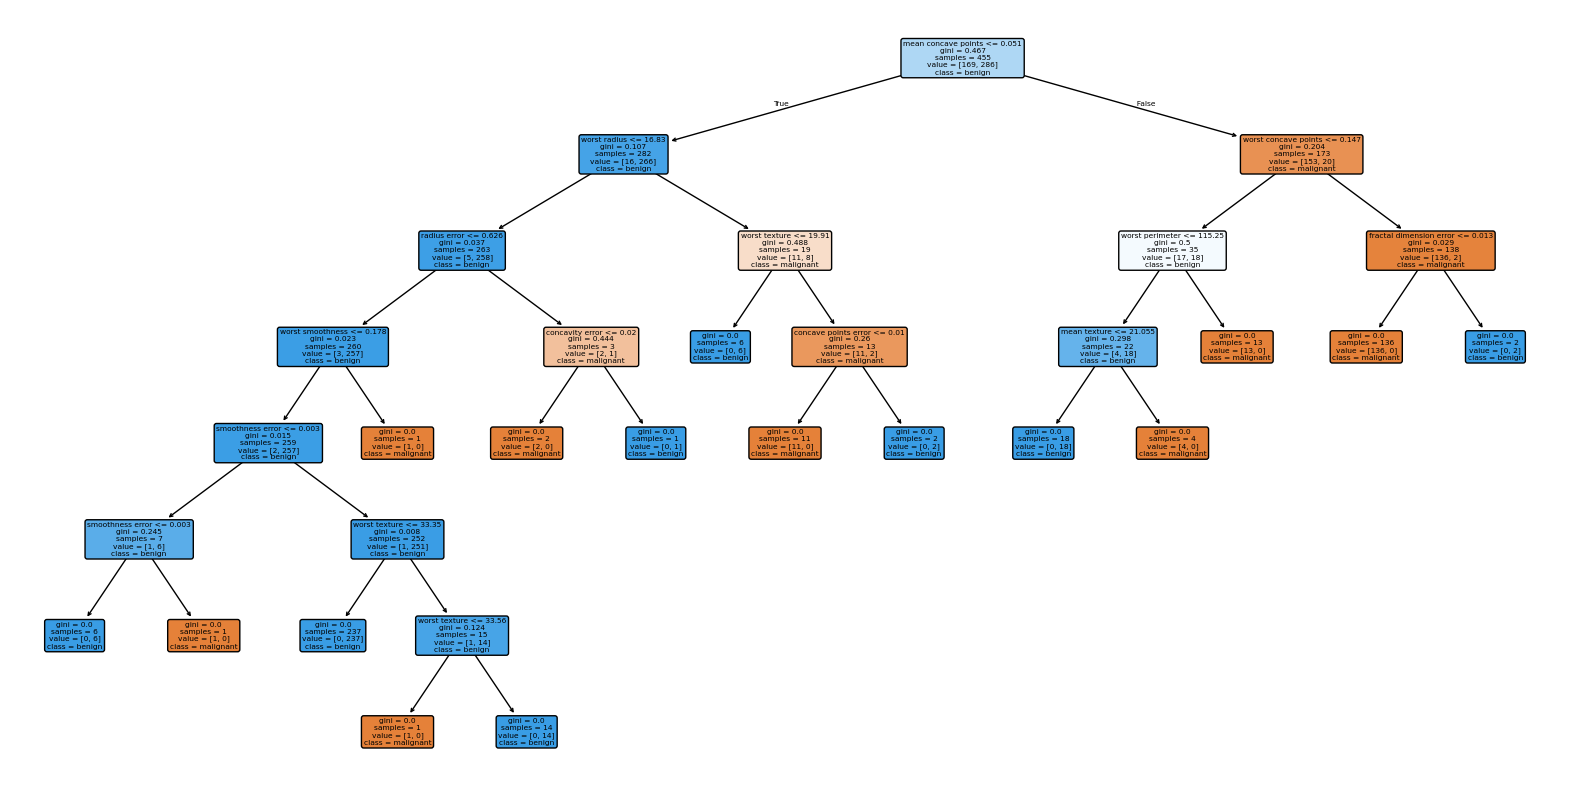

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=data['feature_names'], class_names=data['target_names'], rounded=True)
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
forest_clf = RandomForestClassifier()
forest_clf.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
print(forest_clf.score(x_test, y_test))

0.9649122807017544


In [19]:
print(dict(zip(data['feature_names'], forest_clf.feature_importances_)))

{np.str_('mean radius'): np.float64(0.041563365320782086), np.str_('mean texture'): np.float64(0.021263687525936565), np.str_('mean perimeter'): np.float64(0.06749261871343495), np.str_('mean area'): np.float64(0.031352196546755015), np.str_('mean smoothness'): np.float64(0.005690771082835249), np.str_('mean compactness'): np.float64(0.012807273659340937), np.str_('mean concavity'): np.float64(0.04904081272672167), np.str_('mean concave points'): np.float64(0.11753849040875423), np.str_('mean symmetry'): np.float64(0.005113700357603663), np.str_('mean fractal dimension'): np.float64(0.0036062059671074253), np.str_('radius error'): np.float64(0.015998668465056504), np.str_('texture error'): np.float64(0.004644656590485096), np.str_('perimeter error'): np.float64(0.011542781356072755), np.str_('area error'): np.float64(0.02800684775821895), np.str_('smoothness error'): np.float64(0.0036399474830945576), np.str_('compactness error'): np.float64(0.004192711299074309), np.str_('concavity er

In [20]:
!pip install lime -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [22]:
from lime import lime_tabular

In [23]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=x_train,
    feature_names=data['feature_names'],
    class_names=data['target_names'],
    mode='classification'
    )

Correct:  malignant
Classification:  [1]
{np.str_('mean radius'): np.float64(12.47), np.str_('mean texture'): np.float64(18.6), np.str_('mean perimeter'): np.float64(81.09), np.str_('mean area'): np.float64(481.9), np.str_('mean smoothness'): np.float64(0.09965), np.str_('mean compactness'): np.float64(0.1058), np.str_('mean concavity'): np.float64(0.08005), np.str_('mean concave points'): np.float64(0.03821), np.str_('mean symmetry'): np.float64(0.1925), np.str_('mean fractal dimension'): np.float64(0.06373), np.str_('radius error'): np.float64(0.3961), np.str_('texture error'): np.float64(1.044), np.str_('perimeter error'): np.float64(2.497), np.str_('area error'): np.float64(30.29), np.str_('smoothness error'): np.float64(0.006953), np.str_('compactness error'): np.float64(0.01911), np.str_('concavity error'): np.float64(0.02701), np.str_('concave points error'): np.float64(0.01037), np.str_('symmetry error'): np.float64(0.01782), np.str_('fractal dimension error'): np.float64(0.003

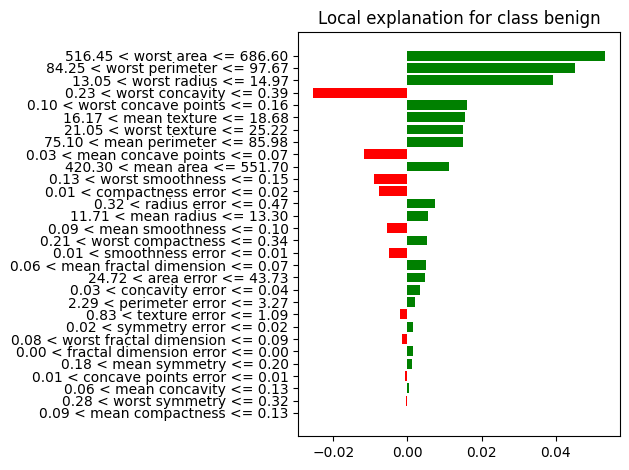

Correct:  benign
Classification:  [0]
{np.str_('mean radius'): np.float64(18.94), np.str_('mean texture'): np.float64(21.31), np.str_('mean perimeter'): np.float64(123.6), np.str_('mean area'): np.float64(1130.0), np.str_('mean smoothness'): np.float64(0.09009), np.str_('mean compactness'): np.float64(0.1029), np.str_('mean concavity'): np.float64(0.108), np.str_('mean concave points'): np.float64(0.07951), np.str_('mean symmetry'): np.float64(0.1582), np.str_('mean fractal dimension'): np.float64(0.05461), np.str_('radius error'): np.float64(0.7888), np.str_('texture error'): np.float64(0.7975), np.str_('perimeter error'): np.float64(5.486), np.str_('area error'): np.float64(96.05), np.str_('smoothness error'): np.float64(0.004444), np.str_('compactness error'): np.float64(0.01652), np.str_('concavity error'): np.float64(0.02269), np.str_('concave points error'): np.float64(0.0137), np.str_('symmetry error'): np.float64(0.01386), np.str_('fractal dimension error'): np.float64(0.001698

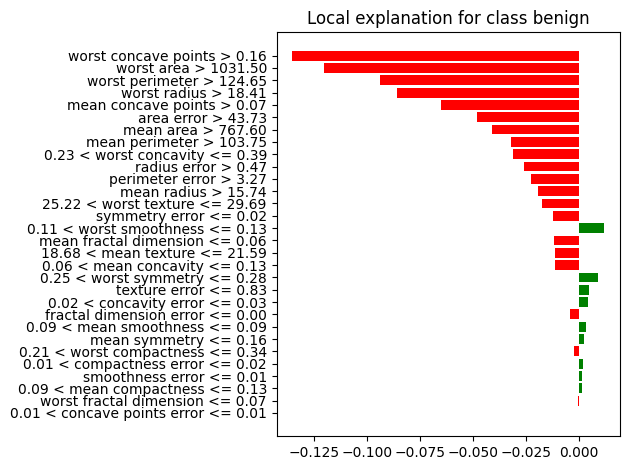

Correct:  benign
Classification:  [0]
{np.str_('mean radius'): np.float64(15.46), np.str_('mean texture'): np.float64(19.48), np.str_('mean perimeter'): np.float64(101.7), np.str_('mean area'): np.float64(748.9), np.str_('mean smoothness'): np.float64(0.1092), np.str_('mean compactness'): np.float64(0.1223), np.str_('mean concavity'): np.float64(0.1466), np.str_('mean concave points'): np.float64(0.08087), np.str_('mean symmetry'): np.float64(0.1931), np.str_('mean fractal dimension'): np.float64(0.05796), np.str_('radius error'): np.float64(0.4743), np.str_('texture error'): np.float64(0.7859), np.str_('perimeter error'): np.float64(3.094), np.str_('area error'): np.float64(48.31), np.str_('smoothness error'): np.float64(0.00624), np.str_('compactness error'): np.float64(0.01484), np.str_('concavity error'): np.float64(0.02813), np.str_('concave points error'): np.float64(0.01093), np.str_('symmetry error'): np.float64(0.01397), np.str_('fractal dimension error'): np.float64(0.002461)

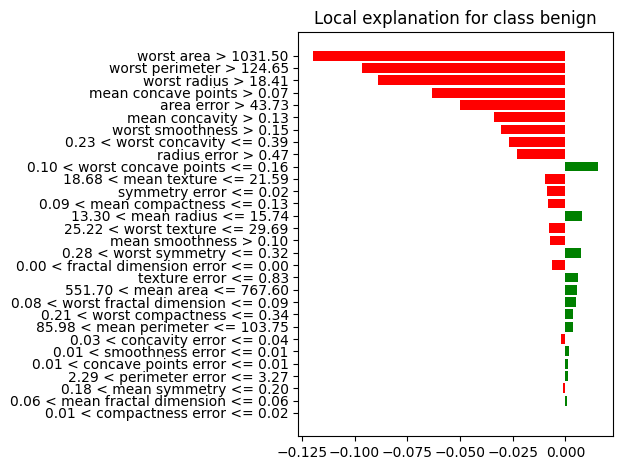

Correct:  malignant
Classification:  [1]
{np.str_('mean radius'): np.float64(12.4), np.str_('mean texture'): np.float64(17.68), np.str_('mean perimeter'): np.float64(81.47), np.str_('mean area'): np.float64(467.8), np.str_('mean smoothness'): np.float64(0.1054), np.str_('mean compactness'): np.float64(0.1316), np.str_('mean concavity'): np.float64(0.07741), np.str_('mean concave points'): np.float64(0.02799), np.str_('mean symmetry'): np.float64(0.1811), np.str_('mean fractal dimension'): np.float64(0.07102), np.str_('radius error'): np.float64(0.1767), np.str_('texture error'): np.float64(1.46), np.str_('perimeter error'): np.float64(2.204), np.str_('area error'): np.float64(15.43), np.str_('smoothness error'): np.float64(0.01), np.str_('compactness error'): np.float64(0.03295), np.str_('concavity error'): np.float64(0.04861), np.str_('concave points error'): np.float64(0.01167), np.str_('symmetry error'): np.float64(0.02187), np.str_('fractal dimension error'): np.float64(0.006005), 

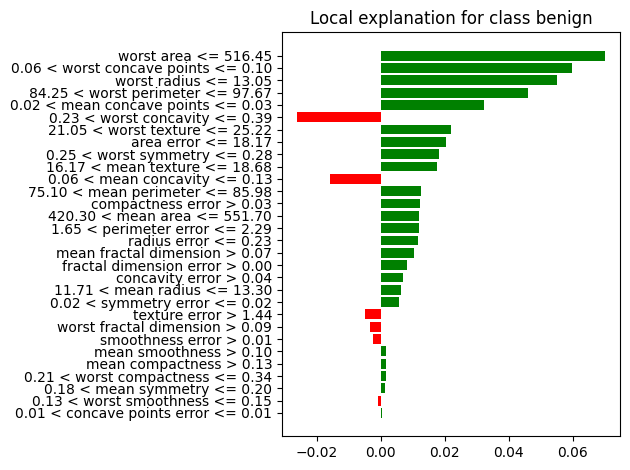

Correct:  malignant
Classification:  [1]
{np.str_('mean radius'): np.float64(11.54), np.str_('mean texture'): np.float64(14.44), np.str_('mean perimeter'): np.float64(74.65), np.str_('mean area'): np.float64(402.9), np.str_('mean smoothness'): np.float64(0.09984), np.str_('mean compactness'): np.float64(0.112), np.str_('mean concavity'): np.float64(0.06737), np.str_('mean concave points'): np.float64(0.02594), np.str_('mean symmetry'): np.float64(0.1818), np.str_('mean fractal dimension'): np.float64(0.06782), np.str_('radius error'): np.float64(0.2784), np.str_('texture error'): np.float64(1.768), np.str_('perimeter error'): np.float64(1.628), np.str_('area error'): np.float64(20.86), np.str_('smoothness error'): np.float64(0.01215), np.str_('compactness error'): np.float64(0.04112), np.str_('concavity error'): np.float64(0.05553), np.str_('concave points error'): np.float64(0.01494), np.str_('symmetry error'): np.float64(0.0184), np.str_('fractal dimension error'): np.float64(0.00551

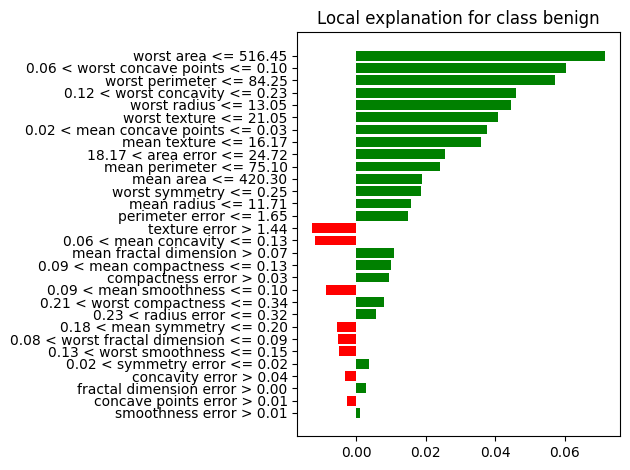

Correct:  benign
Classification:  [0]
{np.str_('mean radius'): np.float64(20.6), np.str_('mean texture'): np.float64(29.33), np.str_('mean perimeter'): np.float64(140.1), np.str_('mean area'): np.float64(1265.0), np.str_('mean smoothness'): np.float64(0.1178), np.str_('mean compactness'): np.float64(0.277), np.str_('mean concavity'): np.float64(0.3514), np.str_('mean concave points'): np.float64(0.152), np.str_('mean symmetry'): np.float64(0.2397), np.str_('mean fractal dimension'): np.float64(0.07016), np.str_('radius error'): np.float64(0.726), np.str_('texture error'): np.float64(1.595), np.str_('perimeter error'): np.float64(5.772), np.str_('area error'): np.float64(86.22), np.str_('smoothness error'): np.float64(0.006522), np.str_('compactness error'): np.float64(0.06158), np.str_('concavity error'): np.float64(0.07117), np.str_('concave points error'): np.float64(0.01664), np.str_('symmetry error'): np.float64(0.02324), np.str_('fractal dimension error'): np.float64(0.006185), np

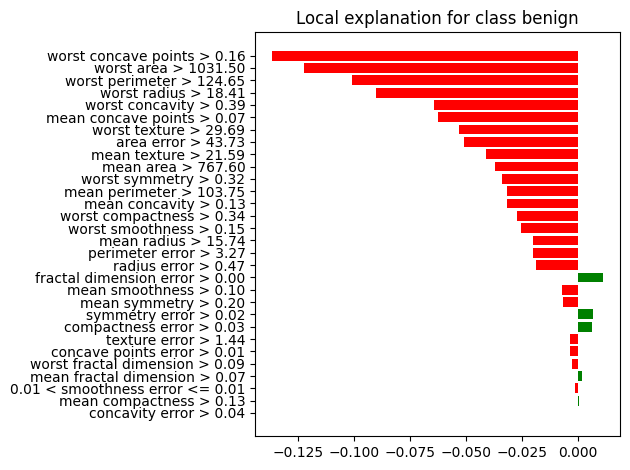

Correct:  benign
Classification:  [0]
{np.str_('mean radius'): np.float64(22.01), np.str_('mean texture'): np.float64(21.9), np.str_('mean perimeter'): np.float64(147.2), np.str_('mean area'): np.float64(1482.0), np.str_('mean smoothness'): np.float64(0.1063), np.str_('mean compactness'): np.float64(0.1954), np.str_('mean concavity'): np.float64(0.2448), np.str_('mean concave points'): np.float64(0.1501), np.str_('mean symmetry'): np.float64(0.1824), np.str_('mean fractal dimension'): np.float64(0.0614), np.str_('radius error'): np.float64(1.008), np.str_('texture error'): np.float64(0.6999), np.str_('perimeter error'): np.float64(7.561), np.str_('area error'): np.float64(130.2), np.str_('smoothness error'): np.float64(0.003978), np.str_('compactness error'): np.float64(0.02821), np.str_('concavity error'): np.float64(0.03576), np.str_('concave points error'): np.float64(0.01471), np.str_('symmetry error'): np.float64(0.01518), np.str_('fractal dimension error'): np.float64(0.003796), 

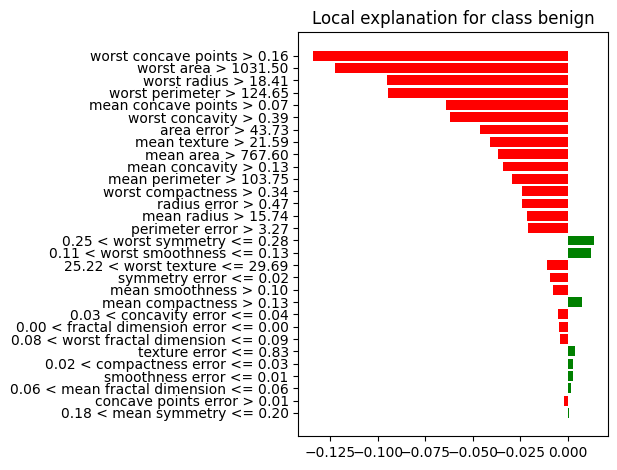

Correct:  benign
Classification:  [0]
{np.str_('mean radius'): np.float64(17.57), np.str_('mean texture'): np.float64(15.05), np.str_('mean perimeter'): np.float64(115.0), np.str_('mean area'): np.float64(955.1), np.str_('mean smoothness'): np.float64(0.09847), np.str_('mean compactness'): np.float64(0.1157), np.str_('mean concavity'): np.float64(0.09875), np.str_('mean concave points'): np.float64(0.07953), np.str_('mean symmetry'): np.float64(0.1739), np.str_('mean fractal dimension'): np.float64(0.06149), np.str_('radius error'): np.float64(0.6003), np.str_('texture error'): np.float64(0.8225), np.str_('perimeter error'): np.float64(4.655), np.str_('area error'): np.float64(61.1), np.str_('smoothness error'): np.float64(0.005627), np.str_('compactness error'): np.float64(0.03033), np.str_('concavity error'): np.float64(0.03407), np.str_('concave points error'): np.float64(0.01354), np.str_('symmetry error'): np.float64(0.01925), np.str_('fractal dimension error'): np.float64(0.00374

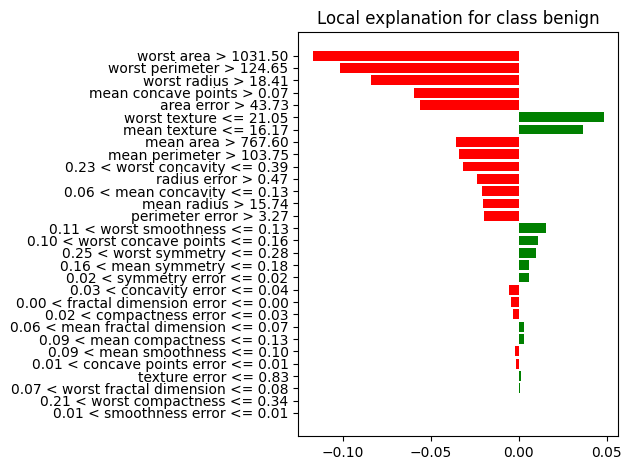

Correct:  malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(13.34), np.str_('mean texture'): np.float64(15.86), np.str_('mean perimeter'): np.float64(86.49), np.str_('mean area'): np.float64(520.0), np.str_('mean smoothness'): np.float64(0.1078), np.str_('mean compactness'): np.float64(0.1535), np.str_('mean concavity'): np.float64(0.1169), np.str_('mean concave points'): np.float64(0.06987), np.str_('mean symmetry'): np.float64(0.1942), np.str_('mean fractal dimension'): np.float64(0.06902), np.str_('radius error'): np.float64(0.286), np.str_('texture error'): np.float64(1.016), np.str_('perimeter error'): np.float64(1.535), np.str_('area error'): np.float64(12.96), np.str_('smoothness error'): np.float64(0.006794), np.str_('compactness error'): np.float64(0.03575), np.str_('concavity error'): np.float64(0.0398), np.str_('concave points error'): np.float64(0.01383), np.str_('symmetry error'): np.float64(0.02134), np.str_('fractal dimension error'): np.float64(0.004603

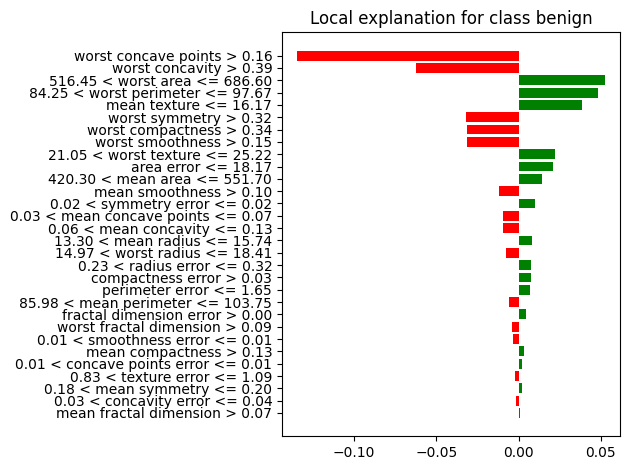

Correct:  malignant
Classification:  [1]
{np.str_('mean radius'): np.float64(13.9), np.str_('mean texture'): np.float64(16.62), np.str_('mean perimeter'): np.float64(88.97), np.str_('mean area'): np.float64(599.4), np.str_('mean smoothness'): np.float64(0.06828), np.str_('mean compactness'): np.float64(0.05319), np.str_('mean concavity'): np.float64(0.02224), np.str_('mean concave points'): np.float64(0.01339), np.str_('mean symmetry'): np.float64(0.1813), np.str_('mean fractal dimension'): np.float64(0.05536), np.str_('radius error'): np.float64(0.1555), np.str_('texture error'): np.float64(0.5762), np.str_('perimeter error'): np.float64(1.392), np.str_('area error'): np.float64(14.03), np.str_('smoothness error'): np.float64(0.003308), np.str_('compactness error'): np.float64(0.01315), np.str_('concavity error'): np.float64(0.009904), np.str_('concave points error'): np.float64(0.004832), np.str_('symmetry error'): np.float64(0.01316), np.str_('fractal dimension error'): np.float64(0

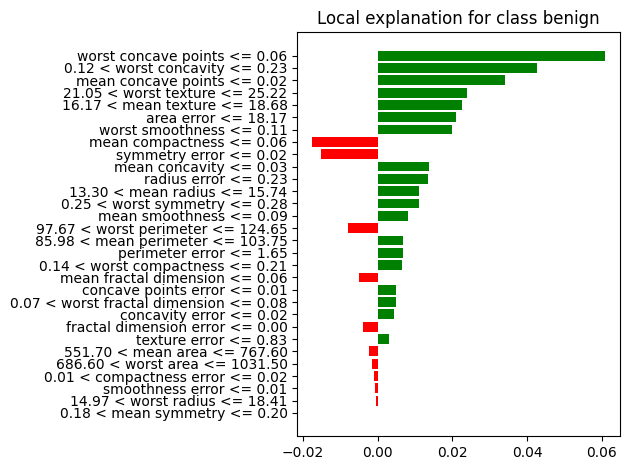

Correct:  malignant
Classification:  [1]
{np.str_('mean radius'): np.float64(13.21), np.str_('mean texture'): np.float64(25.25), np.str_('mean perimeter'): np.float64(84.1), np.str_('mean area'): np.float64(537.9), np.str_('mean smoothness'): np.float64(0.08791), np.str_('mean compactness'): np.float64(0.05205), np.str_('mean concavity'): np.float64(0.02772), np.str_('mean concave points'): np.float64(0.02068), np.str_('mean symmetry'): np.float64(0.1619), np.str_('mean fractal dimension'): np.float64(0.05584), np.str_('radius error'): np.float64(0.2084), np.str_('texture error'): np.float64(1.35), np.str_('perimeter error'): np.float64(1.314), np.str_('area error'): np.float64(17.58), np.str_('smoothness error'): np.float64(0.005768), np.str_('compactness error'): np.float64(0.008082), np.str_('concavity error'): np.float64(0.0151), np.str_('concave points error'): np.float64(0.006451), np.str_('symmetry error'): np.float64(0.01347), np.str_('fractal dimension error'): np.float64(0.00

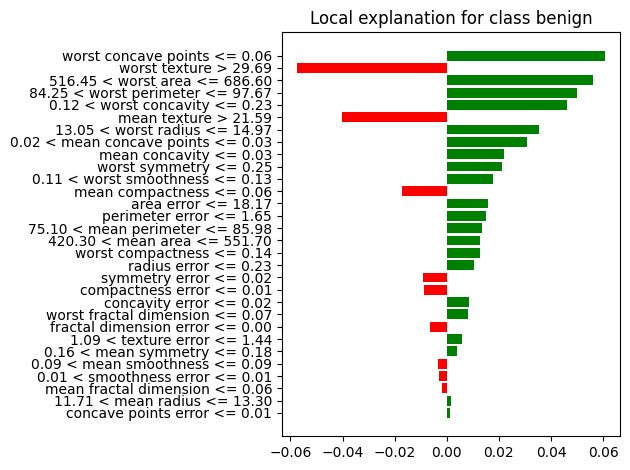

Correct:  benign
Classification:  [0]
{np.str_('mean radius'): np.float64(16.78), np.str_('mean texture'): np.float64(18.8), np.str_('mean perimeter'): np.float64(109.3), np.str_('mean area'): np.float64(886.3), np.str_('mean smoothness'): np.float64(0.08865), np.str_('mean compactness'): np.float64(0.09182), np.str_('mean concavity'): np.float64(0.08422), np.str_('mean concave points'): np.float64(0.06576), np.str_('mean symmetry'): np.float64(0.1893), np.str_('mean fractal dimension'): np.float64(0.05534), np.str_('radius error'): np.float64(0.599), np.str_('texture error'): np.float64(1.391), np.str_('perimeter error'): np.float64(4.129), np.str_('area error'): np.float64(67.34), np.str_('smoothness error'): np.float64(0.006123), np.str_('compactness error'): np.float64(0.0247), np.str_('concavity error'): np.float64(0.02626), np.str_('concave points error'): np.float64(0.01604), np.str_('symmetry error'): np.float64(0.02091), np.str_('fractal dimension error'): np.float64(0.003493)

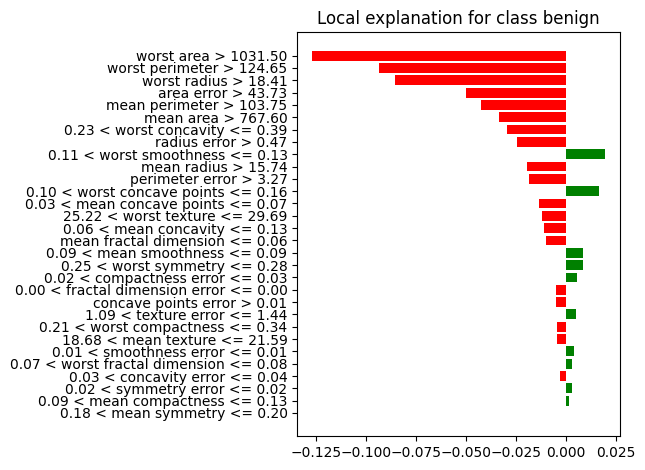

Correct:  malignant
Classification:  [1]
{np.str_('mean radius'): np.float64(14.97), np.str_('mean texture'): np.float64(19.76), np.str_('mean perimeter'): np.float64(95.5), np.str_('mean area'): np.float64(690.2), np.str_('mean smoothness'): np.float64(0.08421), np.str_('mean compactness'): np.float64(0.05352), np.str_('mean concavity'): np.float64(0.01947), np.str_('mean concave points'): np.float64(0.01939), np.str_('mean symmetry'): np.float64(0.1515), np.str_('mean fractal dimension'): np.float64(0.05266), np.str_('radius error'): np.float64(0.184), np.str_('texture error'): np.float64(1.065), np.str_('perimeter error'): np.float64(1.286), np.str_('area error'): np.float64(16.64), np.str_('smoothness error'): np.float64(0.003634), np.str_('compactness error'): np.float64(0.007983), np.str_('concavity error'): np.float64(0.008268), np.str_('concave points error'): np.float64(0.006432), np.str_('symmetry error'): np.float64(0.01924), np.str_('fractal dimension error'): np.float64(0.

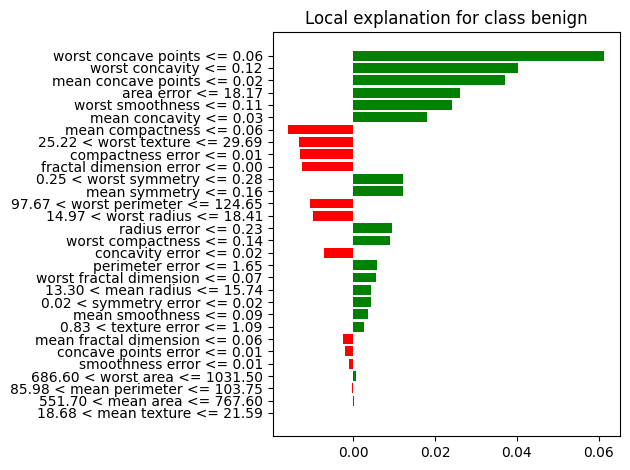

Correct:  benign
Classification:  [0]
{np.str_('mean radius'): np.float64(16.26), np.str_('mean texture'): np.float64(21.88), np.str_('mean perimeter'): np.float64(107.5), np.str_('mean area'): np.float64(826.8), np.str_('mean smoothness'): np.float64(0.1165), np.str_('mean compactness'): np.float64(0.1283), np.str_('mean concavity'): np.float64(0.1799), np.str_('mean concave points'): np.float64(0.07981), np.str_('mean symmetry'): np.float64(0.1869), np.str_('mean fractal dimension'): np.float64(0.06532), np.str_('radius error'): np.float64(0.5706), np.str_('texture error'): np.float64(1.457), np.str_('perimeter error'): np.float64(2.961), np.str_('area error'): np.float64(57.72), np.str_('smoothness error'): np.float64(0.01056), np.str_('compactness error'): np.float64(0.03756), np.str_('concavity error'): np.float64(0.05839), np.str_('concave points error'): np.float64(0.01186), np.str_('symmetry error'): np.float64(0.04022), np.str_('fractal dimension error'): np.float64(0.006187),

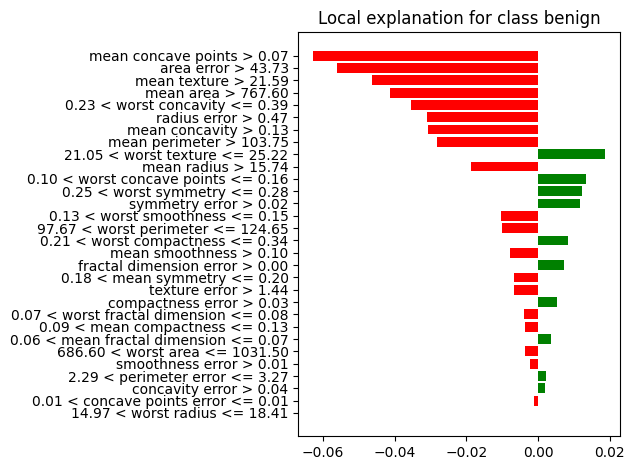

Correct:  malignant
Classification:  [1]
{np.str_('mean radius'): np.float64(12.34), np.str_('mean texture'): np.float64(12.27), np.str_('mean perimeter'): np.float64(78.94), np.str_('mean area'): np.float64(468.5), np.str_('mean smoothness'): np.float64(0.09003), np.str_('mean compactness'): np.float64(0.06307), np.str_('mean concavity'): np.float64(0.02958), np.str_('mean concave points'): np.float64(0.02647), np.str_('mean symmetry'): np.float64(0.1689), np.str_('mean fractal dimension'): np.float64(0.05808), np.str_('radius error'): np.float64(0.1166), np.str_('texture error'): np.float64(0.4957), np.str_('perimeter error'): np.float64(0.7714), np.str_('area error'): np.float64(8.955), np.str_('smoothness error'): np.float64(0.003681), np.str_('compactness error'): np.float64(0.009169), np.str_('concavity error'): np.float64(0.008732), np.str_('concave points error'): np.float64(0.00574), np.str_('symmetry error'): np.float64(0.01129), np.str_('fractal dimension error'): np.float64

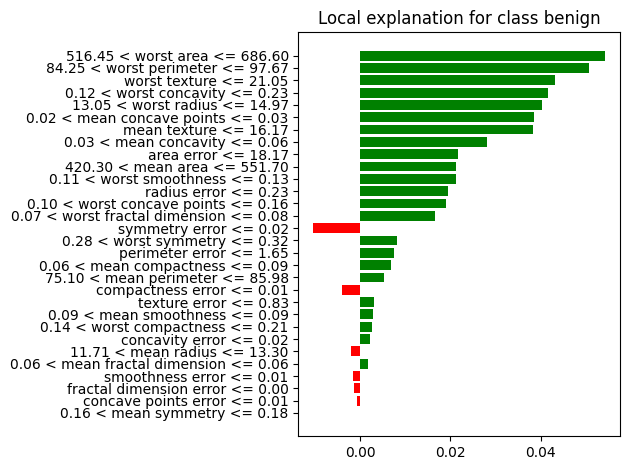

Correct:  benign
Classification:  [0]
{np.str_('mean radius'): np.float64(19.1), np.str_('mean texture'): np.float64(26.29), np.str_('mean perimeter'): np.float64(129.1), np.str_('mean area'): np.float64(1132.0), np.str_('mean smoothness'): np.float64(0.1215), np.str_('mean compactness'): np.float64(0.1791), np.str_('mean concavity'): np.float64(0.1937), np.str_('mean concave points'): np.float64(0.1469), np.str_('mean symmetry'): np.float64(0.1634), np.str_('mean fractal dimension'): np.float64(0.07224), np.str_('radius error'): np.float64(0.519), np.str_('texture error'): np.float64(2.91), np.str_('perimeter error'): np.float64(5.801), np.str_('area error'): np.float64(67.1), np.str_('smoothness error'): np.float64(0.007545), np.str_('compactness error'): np.float64(0.0605), np.str_('concavity error'): np.float64(0.02134), np.str_('concave points error'): np.float64(0.01843), np.str_('symmetry error'): np.float64(0.03056), np.str_('fractal dimension error'): np.float64(0.01039), np.s

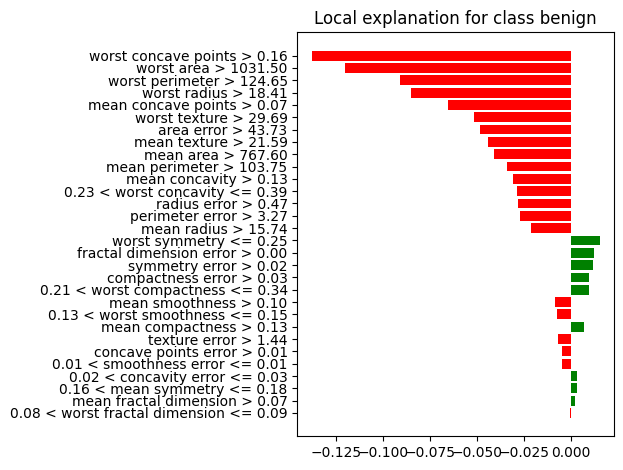

Correct:  malignant
Classification:  [1]
{np.str_('mean radius'): np.float64(14.81), np.str_('mean texture'): np.float64(14.7), np.str_('mean perimeter'): np.float64(94.66), np.str_('mean area'): np.float64(680.7), np.str_('mean smoothness'): np.float64(0.08472), np.str_('mean compactness'): np.float64(0.05016), np.str_('mean concavity'): np.float64(0.03416), np.str_('mean concave points'): np.float64(0.02541), np.str_('mean symmetry'): np.float64(0.1659), np.str_('mean fractal dimension'): np.float64(0.05348), np.str_('radius error'): np.float64(0.2182), np.str_('texture error'): np.float64(0.6232), np.str_('perimeter error'): np.float64(1.677), np.str_('area error'): np.float64(20.72), np.str_('smoothness error'): np.float64(0.006708), np.str_('compactness error'): np.float64(0.01197), np.str_('concavity error'): np.float64(0.01482), np.str_('concave points error'): np.float64(0.01056), np.str_('symmetry error'): np.float64(0.0158), np.str_('fractal dimension error'): np.float64(0.00

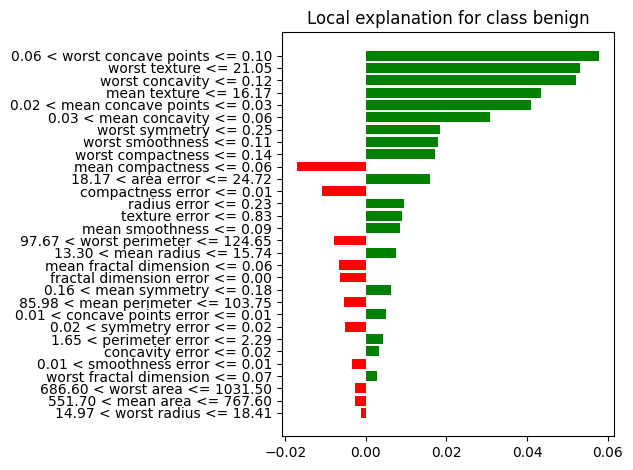

Correct:  malignant
Classification:  [1]
{np.str_('mean radius'): np.float64(10.16), np.str_('mean texture'): np.float64(19.59), np.str_('mean perimeter'): np.float64(64.73), np.str_('mean area'): np.float64(311.7), np.str_('mean smoothness'): np.float64(0.1003), np.str_('mean compactness'): np.float64(0.07504), np.str_('mean concavity'): np.float64(0.005025), np.str_('mean concave points'): np.float64(0.01116), np.str_('mean symmetry'): np.float64(0.1791), np.str_('mean fractal dimension'): np.float64(0.06331), np.str_('radius error'): np.float64(0.2441), np.str_('texture error'): np.float64(2.09), np.str_('perimeter error'): np.float64(1.648), np.str_('area error'): np.float64(16.8), np.str_('smoothness error'): np.float64(0.01291), np.str_('compactness error'): np.float64(0.02222), np.str_('concavity error'): np.float64(0.004174), np.str_('concave points error'): np.float64(0.007082), np.str_('symmetry error'): np.float64(0.02572), np.str_('fractal dimension error'): np.float64(0.00

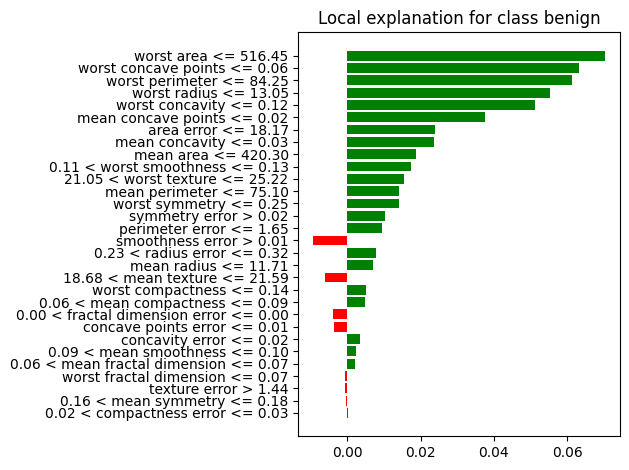

Correct:  malignant
Classification:  [1]
{np.str_('mean radius'): np.float64(6.981), np.str_('mean texture'): np.float64(13.43), np.str_('mean perimeter'): np.float64(43.79), np.str_('mean area'): np.float64(143.5), np.str_('mean smoothness'): np.float64(0.117), np.str_('mean compactness'): np.float64(0.07568), np.str_('mean concavity'): np.float64(0.0), np.str_('mean concave points'): np.float64(0.0), np.str_('mean symmetry'): np.float64(0.193), np.str_('mean fractal dimension'): np.float64(0.07818), np.str_('radius error'): np.float64(0.2241), np.str_('texture error'): np.float64(1.508), np.str_('perimeter error'): np.float64(1.553), np.str_('area error'): np.float64(9.833), np.str_('smoothness error'): np.float64(0.01019), np.str_('compactness error'): np.float64(0.01084), np.str_('concavity error'): np.float64(0.0), np.str_('concave points error'): np.float64(0.0), np.str_('symmetry error'): np.float64(0.02659), np.str_('fractal dimension error'): np.float64(0.0041), np.str_('worst

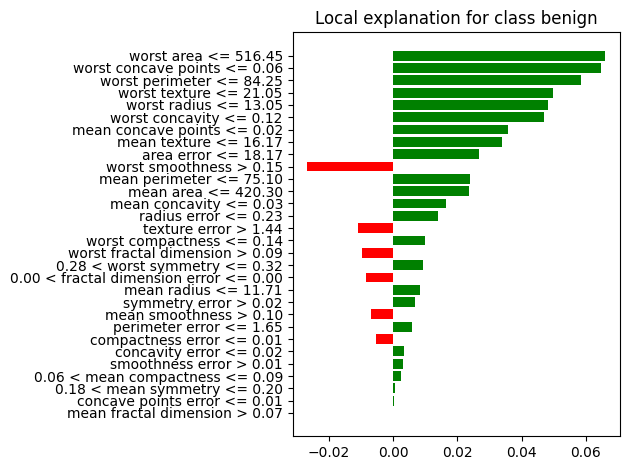

Correct:  benign
Classification:  [0]
{np.str_('mean radius'): np.float64(20.55), np.str_('mean texture'): np.float64(20.86), np.str_('mean perimeter'): np.float64(137.8), np.str_('mean area'): np.float64(1308.0), np.str_('mean smoothness'): np.float64(0.1046), np.str_('mean compactness'): np.float64(0.1739), np.str_('mean concavity'): np.float64(0.2085), np.str_('mean concave points'): np.float64(0.1322), np.str_('mean symmetry'): np.float64(0.2127), np.str_('mean fractal dimension'): np.float64(0.06251), np.str_('radius error'): np.float64(0.6986), np.str_('texture error'): np.float64(0.9901), np.str_('perimeter error'): np.float64(4.706), np.str_('area error'): np.float64(87.78), np.str_('smoothness error'): np.float64(0.004578), np.str_('compactness error'): np.float64(0.02616), np.str_('concavity error'): np.float64(0.04005), np.str_('concave points error'): np.float64(0.01421), np.str_('symmetry error'): np.float64(0.01948), np.str_('fractal dimension error'): np.float64(0.002689

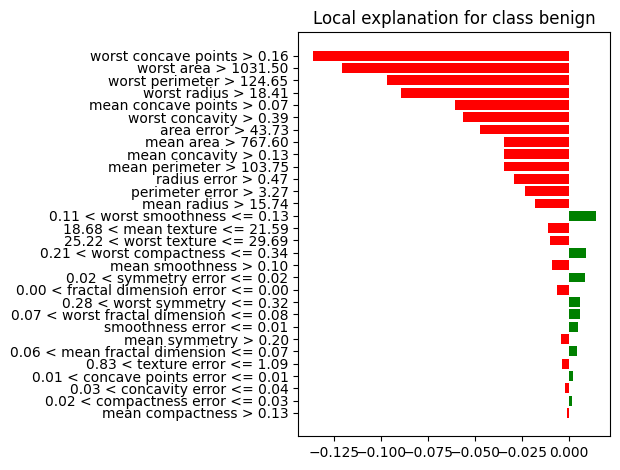

In [26]:
for i in range(20):
    print("Correct: ", 'benign' if y_test[i] == 0 else 'malignant')
    print("Classification: ", forest_clf.predict([x_test[i]]))
    print(dict(zip(data['feature_names'], x_test[i])))

    instance = x_test[i]

    exp = explainer.explain_instance(
        data_row = x_test[i],
        predict_fn=forest_clf.predict_proba,
        num_features=30
        )

    fig = exp.as_pyplot_figure()
    plt.tight_layout()
    plt.show()